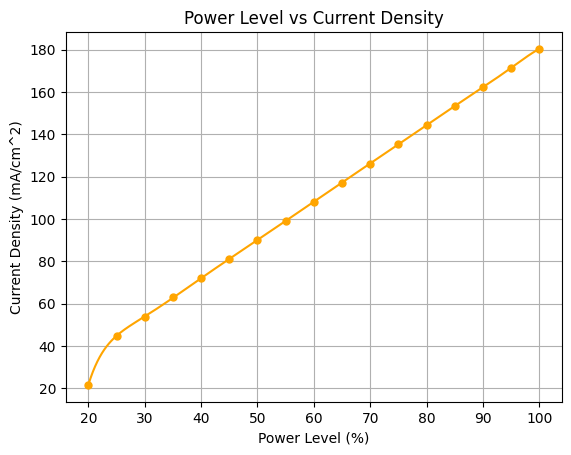

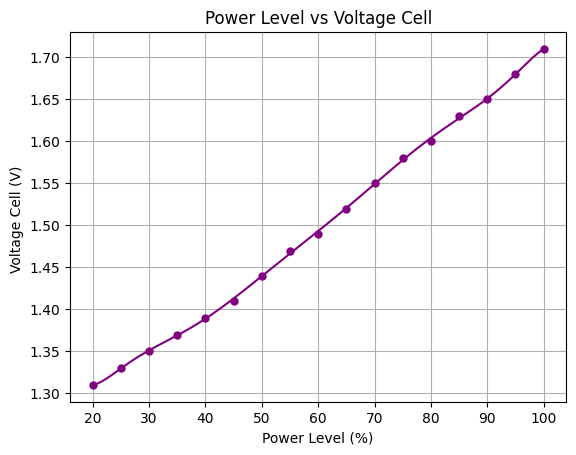

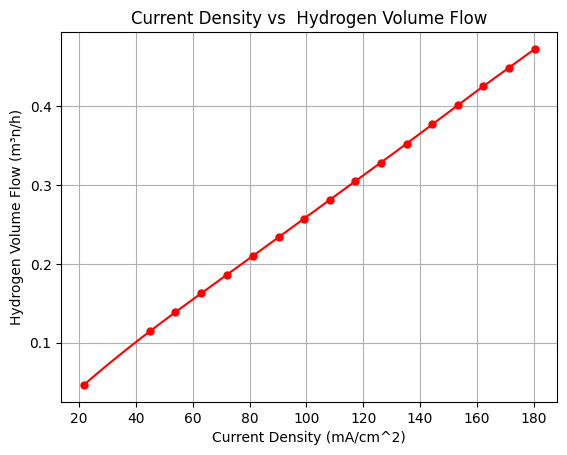

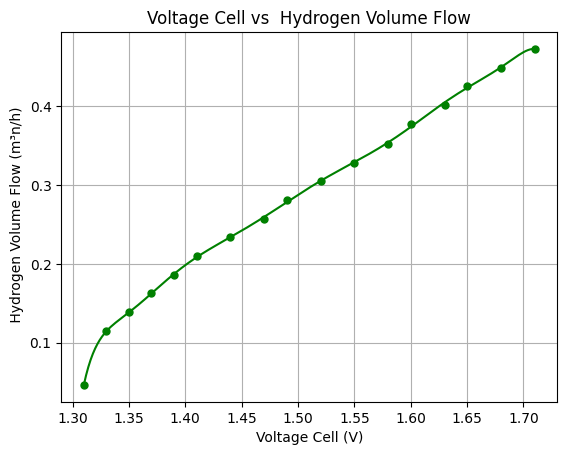

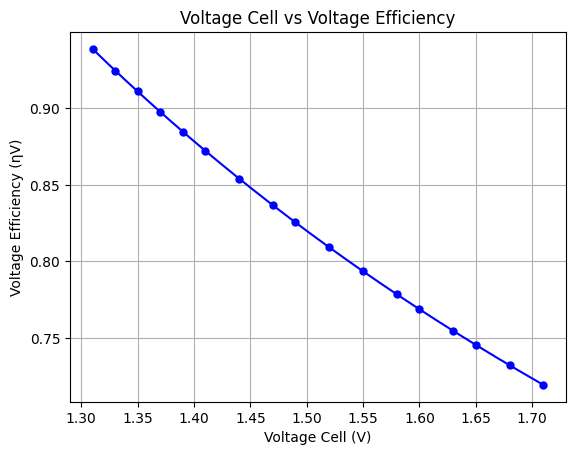

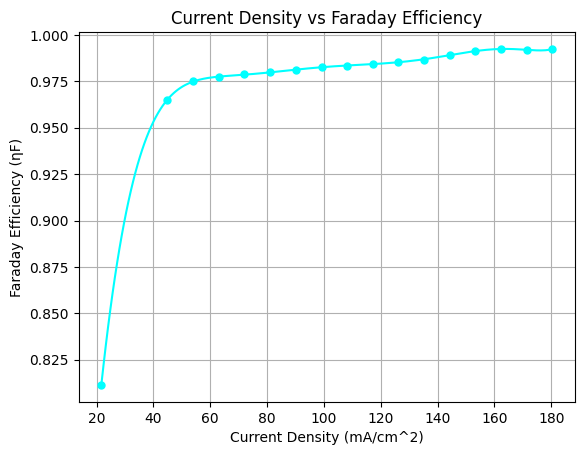

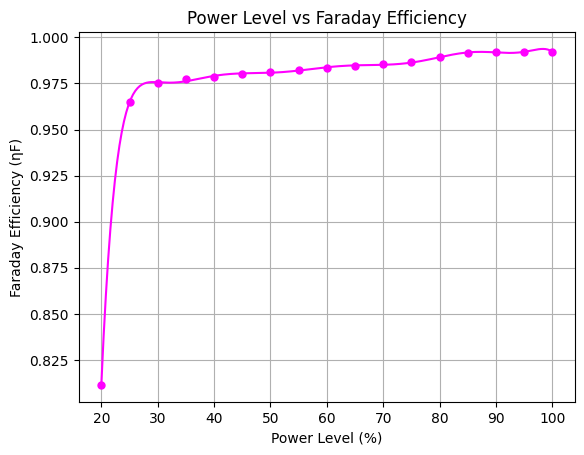

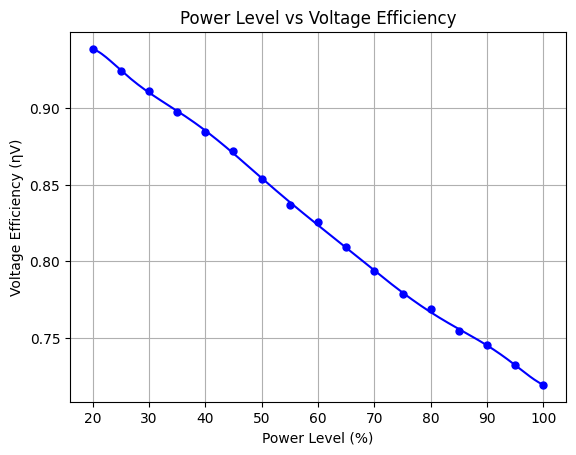

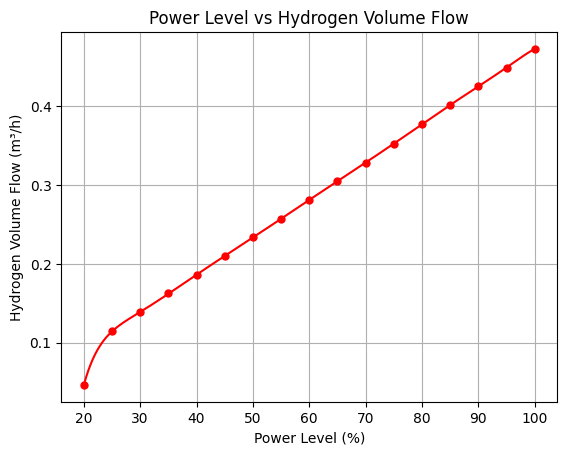

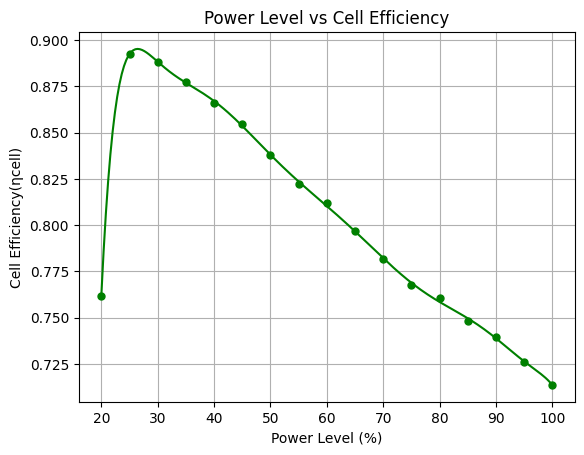

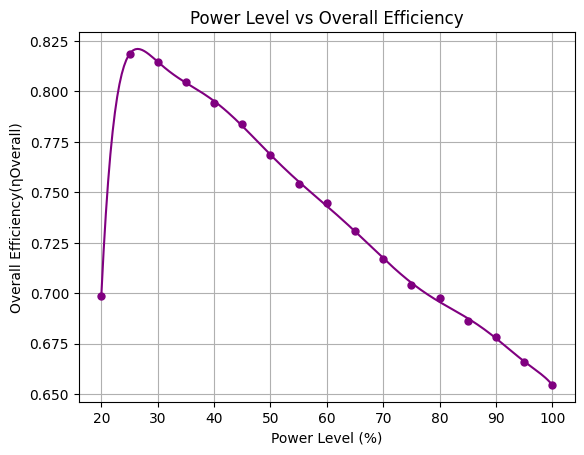

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Load the Excel file
file_path = 'C:\\Users\\User\\Desktop\\Internship\\Real Results\\Book1.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Rename columns for easier access
df.columns = [
    'Power_Level', 'Voltage', 'Current', 'Surface_Area', 'Hydrogen_Volume_Flow',
    'Valve_Output', 'Temperature', 'Pressure', 'Voltage_Cell', 'Current_Density', 
    'Current_Cell', 'Real_Hydrogen_Volume_Flow_m3', 'Real_Hydrogen_Volume_Flow_kg', 
    'Mass_Flow_kg_s', 'Hydrogen_Mol_Flow', 'Voltage_Efficiency', 'Faraday_Efficiency', 
    'Cell_Efficiency', 'Power', 'Overall_Efficiency'
]

# Drop the first row if it contains units (adjust as needed)
df = df.drop(0)

# Ensure columns are numeric and handle non-numeric values gracefully
df['Power_Level'] = pd.to_numeric(df['Power_Level'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Voltage_Cell'] = pd.to_numeric(df['Voltage_Cell'], errors='coerce')
df['Current_Density'] = pd.to_numeric(df['Current_Density'], errors='coerce')
df['Real_Hydrogen_Volume_Flow_m3'] = pd.to_numeric(df['Real_Hydrogen_Volume_Flow_m3'], errors='coerce')
df['Voltage_Efficiency'] = pd.to_numeric(df['Voltage_Efficiency'], errors='coerce')
df['Faraday_Efficiency'] = pd.to_numeric(df['Faraday_Efficiency'], errors='coerce')
df['Cell_Efficiency'] = pd.to_numeric(df['Cell_Efficiency'], errors='coerce')
df['Overall_Efficiency'] = pd.to_numeric(df['Overall_Efficiency'], errors='coerce')

# Drop rows with NaN values in any of the relevant columns
df = df.dropna(subset=['Power_Level', 'Voltage_Cell', 'Current_Density', 'Real_Hydrogen_Volume_Flow_m3', 
                       'Voltage_Efficiency', 'Faraday_Efficiency', 'Cell_Efficiency', 'Overall_Efficiency'])

# Convert to arrays (or series) for polynomial fitting
power_level = df['Power_Level'].values
voltage = df['Voltage'].values
voltage_cell = df['Voltage_Cell'].values
current_density = df['Current_Density'].values
real_hydrogen_volume_flow_m3 = df['Real_Hydrogen_Volume_Flow_m3'].values
voltage_efficiency = df['Voltage_Efficiency'].values
faraday_efficiency = df['Faraday_Efficiency'].values
cell_efficiency = df['Cell_Efficiency'].values
overall_efficiency = df['Overall_Efficiency'].values

# Polynomial Regression for Smoothing
degree = 10  # Polynomial degree for regression smoothing

# Fit polynomial regressions for each plot
poly_voltage_cell = Polynomial.fit(power_level, voltage_cell, degree)
poly_current_density = Polynomial.fit(power_level, current_density, degree)
poly_real_hydrogen_volume_flow_m3 = Polynomial.fit(power_level, real_hydrogen_volume_flow_m3, degree)
poly_voltage_efficiency = Polynomial.fit(power_level, voltage_efficiency, degree)
poly_faraday_efficiency = Polynomial.fit(power_level, faraday_efficiency, degree)
poly_cell_efficiency = Polynomial.fit(power_level, cell_efficiency, degree)
poly_overall_efficiency = Polynomial.fit(power_level, overall_efficiency, degree)

# Generate smooth x-axis values for interpolation
power_smooth = np.linspace(power_level.min(), power_level.max(), 200)

# Function to plot and save each graph as an individual image
def save_individual_graphs():
    # Power Level vs Current Density
    plt.figure()
    plt.plot(power_level, current_density, 'o', markersize=5, color='orange')
    plt.plot(power_smooth, poly_current_density(power_smooth), '-', label='Current Density (smoothed)', color='orange')
    plt.title('Power Level vs Current Density')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Current Density (mA/cm^2)')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Current_Density.png')

    # Power Level vs Voltage Cell
    plt.figure()
    plt.plot(power_level, voltage_cell, 'o', markersize=5, color='purple')
    plt.plot(power_smooth, poly_voltage_cell(power_smooth), '-', label='Voltage Cell (smoothed)', color='purple')
    plt.title('Power Level vs Voltage Cell')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Voltage Cell (V) ')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Voltage_Cell.png')

    # Current Density vs Real Hydrogen Volume Flow (m³)
    plt.figure()
    plt.plot(current_density, real_hydrogen_volume_flow_m3, 'o', markersize=5, color='red')
    plt.plot(np.linspace(current_density.min(), current_density.max(), 200), 
             Polynomial.fit(current_density, real_hydrogen_volume_flow_m3, 10)(np.linspace(current_density.min(), current_density.max(), 200)),
             '-', label=' Hydrogen Volume Flow (smoothed)', color='red')
    plt.title('Current Density vs  Hydrogen Volume Flow')
    plt.xlabel('Current Density (mA/cm^2)')
    plt.ylabel('Hydrogen Volume Flow (m³n/h)')
    plt.grid(True)
    plt.savefig('Current_Density_vs_Hydrogen_Volume_Flow.png')

    # Voltage Cell vs Real Hydrogen Volume Flow (m³)
    plt.figure()
    plt.plot(voltage_cell, real_hydrogen_volume_flow_m3, 'o', markersize=5, color='green')
    plt.plot(np.linspace(voltage_cell.min(), voltage_cell.max(), 200), 
             Polynomial.fit(voltage_cell, real_hydrogen_volume_flow_m3, 10)(np.linspace(voltage_cell.min(), voltage_cell.max(), 200)),
             '-', label=' Hydrogen Volume Flow (smoothed)', color='green')
    plt.title('Voltage Cell vs  Hydrogen Volume Flow')
    plt.xlabel('Voltage Cell (V)')
    plt.ylabel(' Hydrogen Volume Flow (m³n/h)')
    plt.grid(True)
    plt.savefig('Voltage_Cell_vs_Real_Hydrogen_Volume_Flow.png')

    # Voltage Cell vs Voltage Efficiency
    plt.figure()
    plt.plot(voltage_cell, voltage_efficiency, 'o', markersize=5, color='blue')
    plt.plot(np.linspace(voltage_cell.min(), voltage_cell.max(), 200), 
             Polynomial.fit(voltage_cell, voltage_efficiency, 10)(np.linspace(voltage_cell.min(), voltage_cell.max(), 200)),
             '-', label='Voltage Efficiency (smoothed)', color='blue')
    plt.title('Voltage Cell vs Voltage Efficiency')
    plt.xlabel('Voltage Cell (V)')
    plt.ylabel('Voltage Efficiency (ηV)')
    plt.grid(True)
    plt.savefig('Voltage_Cell_vs_Voltage_Efficiency.png')

    # Current Density vs Faraday Efficiency
    plt.figure()
    plt.plot(current_density, faraday_efficiency, 'o', markersize=5, color='cyan')
    plt.plot(np.linspace(current_density.min(), current_density.max(), 200), 
             Polynomial.fit(current_density, faraday_efficiency, 10)(np.linspace(current_density.min(), current_density.max(), 200)),
             '-', label='Faraday Efficiency (smoothed)', color='cyan')
    plt.title('Current Density vs Faraday Efficiency')
    plt.xlabel('Current Density (mA/cm^2)')
    plt.ylabel('Faraday Efficiency (ηF)')
    plt.grid(True)
    plt.savefig('Current_Density_vs_Faraday_Efficiency.png')

    # Power Level vs Faraday Efficiency
    plt.figure()
    plt.plot(power_level, faraday_efficiency, 'o', markersize=5, color='magenta')
    plt.plot(power_smooth, poly_faraday_efficiency(power_smooth), '-', label='Faraday Efficiency (smoothed)', color='magenta')
    plt.title('Power Level vs Faraday Efficiency')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Faraday Efficiency (ηF)')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Faraday_Efficiency.png')

    # Power Level vs Voltage Efficiency
    plt.figure()
    plt.plot(power_level, voltage_efficiency, 'o', markersize=5, color='blue')
    plt.plot(power_smooth, poly_voltage_efficiency(power_smooth), '-', label='Voltage Efficiency (smoothed)', color='blue')
    plt.title('Power Level vs Voltage Efficiency')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Voltage Efficiency (ηV)')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Voltage_Efficiency.png')

    # Power Level vs Real Hydrogen Volume Flow (m³)
    plt.figure()
    plt.plot(power_level, real_hydrogen_volume_flow_m3, 'o', markersize=5, color='red')
    plt.plot(power_smooth, poly_real_hydrogen_volume_flow_m3(power_smooth), '-', label='Real Hydrogen Volume Flow (smoothed)', color='red')
    plt.title('Power Level vs Hydrogen Volume Flow')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Hydrogen Volume Flow (m³/h)')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Hydrogen_Volume_Flow.png')

    # Power Level vs Cell Efficiency
    plt.figure()
    plt.plot(power_level, cell_efficiency, 'o', markersize=5, color='green')
    plt.plot(power_smooth, poly_cell_efficiency(power_smooth), '-', label='Cell Efficiency (smoothed)', color='green')
    plt.title('Power Level vs Cell Efficiency')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Cell Efficiency(ηcell)')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Cell_Efficiency.png')

    # Power Level vs Overall Efficiency
    plt.figure()
    plt.plot(power_level, overall_efficiency, 'o', markersize=5, color='purple')
    plt.plot(power_smooth, poly_overall_efficiency(power_smooth), '-', label='Overall Efficiency (smoothed)', color='purple')
    plt.title('Power Level vs Overall Efficiency')
    plt.xlabel('Power Level (%)')
    plt.ylabel('Overall Efficiency(ηOverall)')
    plt.grid(True)
    plt.savefig('Power_Level_vs_Overall_Efficiency.png')

# Call the function to save the graphs
save_individual_graphs()
